In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [3]:
## Importing train data
df_train=pd.read_csv('blackFriday_train.csv')

In [4]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
df_train.shape

(550068, 12)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
## Importing test data
df_test=pd.read_csv('blackFriday_test.csv')

In [9]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [10]:
df_test.shape

(233599, 11)

In [11]:
df_test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [13]:
# Append both train and test data
df = df_train.append(df_test)

In [14]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [16]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [17]:
df.shape

(783667, 12)

In [18]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [19]:
# user id is unique for everyone so of no use
df.drop(['User_ID'],axis=1,inplace=True)

In [20]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [21]:
## We can also use label encoder for encoding categorucal data in numerical
from sklearn import preprocessing

encod =['Gender','Age','City_Category']
label_encoder= preprocessing.LabelEncoder()

df[encod] = df[encod].apply(label_encoder.fit_transform)

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,2,4+,0,8,NaN,NaN,7969.0


In [22]:
# We can also use map function instead of label encoder
#df['Gender']=df['Gender'].map({'F':0,'M':1})   

In [23]:
# Missing values
df.isnull().values.any()

True

In [24]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

Handling missing values

In [25]:
# Handling missing values for product category 2
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [26]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [27]:
df['Product_Category_2'].mode()[0]

8.0

In [28]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [29]:
df['Product_Category_2'].isnull().sum()

0

In [30]:
# Handling missing values for product category 3
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [31]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [32]:
df['Product_Category_3'].mode()[0]

16.0

In [33]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [34]:
df['Product_Category_3'].isnull().sum()

0

In [35]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,1,6,16,2,4+,0,8,8.0,16.0,7969.0


In [36]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [37]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [38]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,1,6,16,2,4,0,8,8.0,16.0,7969.0


In [39]:
# Converting object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int32  
 2   Age                         783667 non-null  int32  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int32  
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int32(4), int64(3), object(1)
memory usage: 59.8+ MB


Visualization

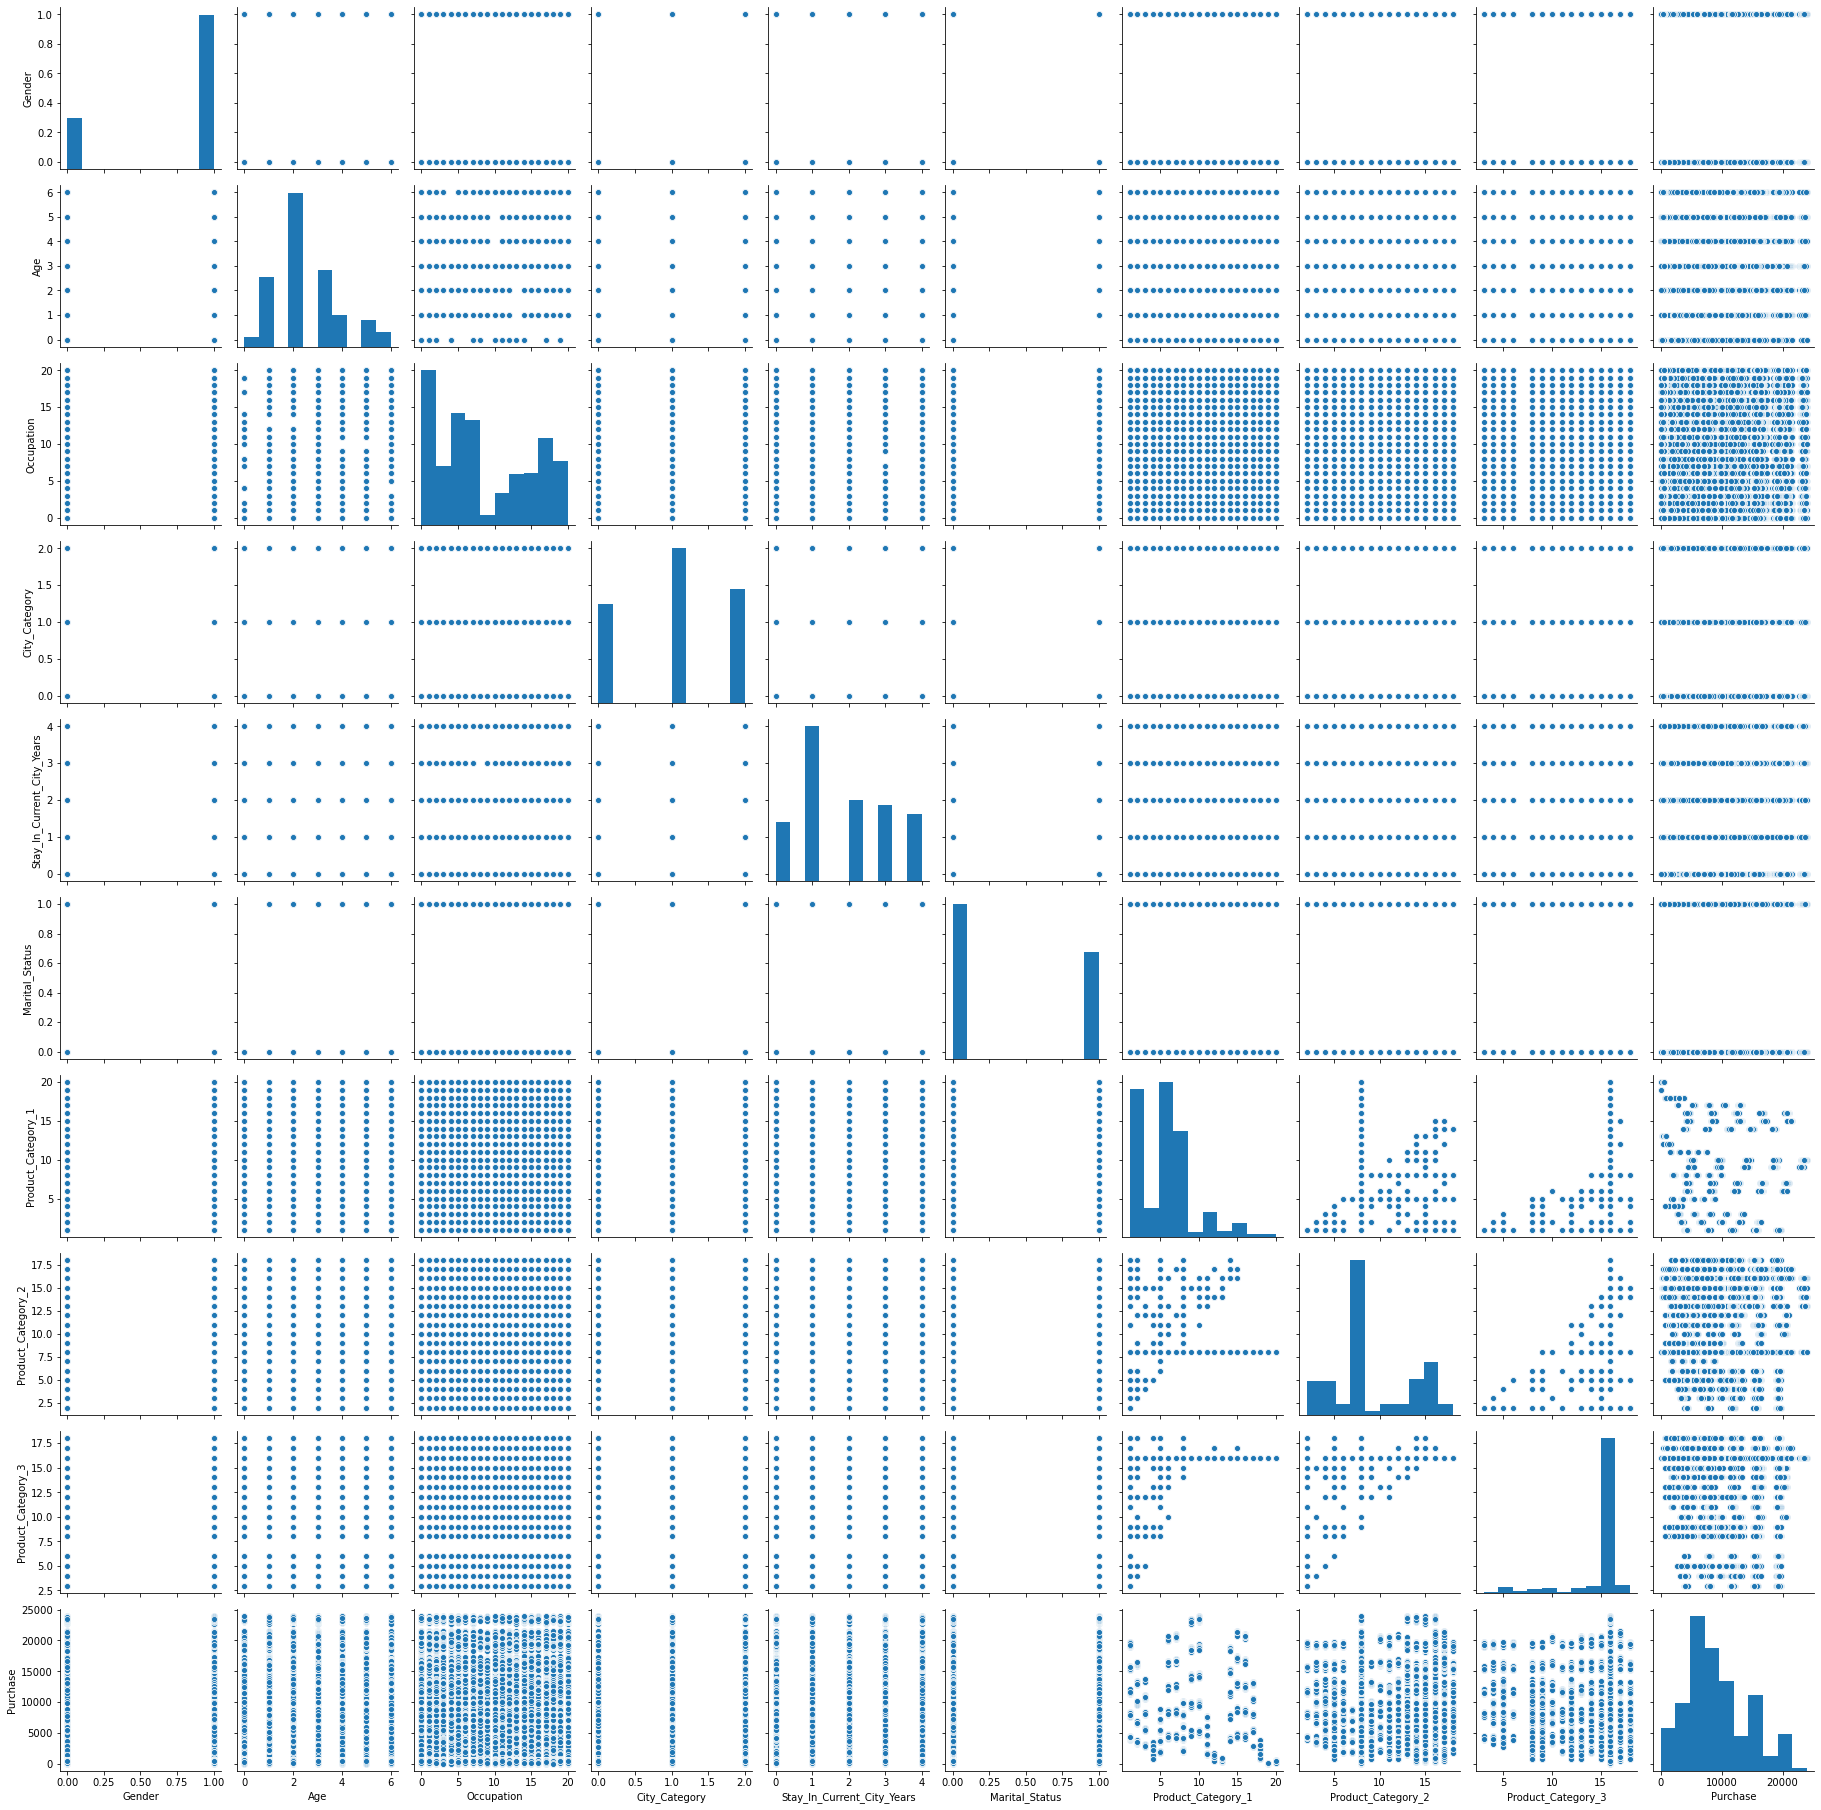

In [41]:
sns.pairplot(df)

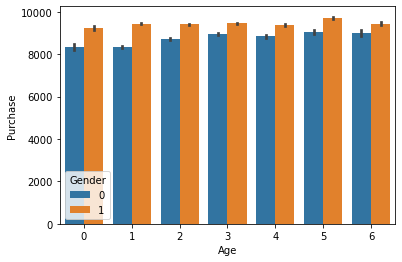

In [42]:
sns.barplot('Age','Purchase',hue='Gender',data=df)

# Purchasing of men is higher than women

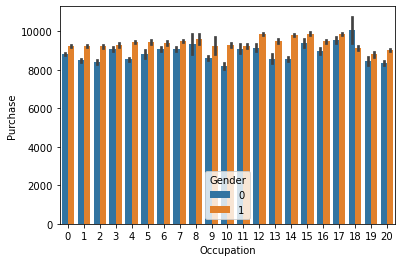

In [43]:
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

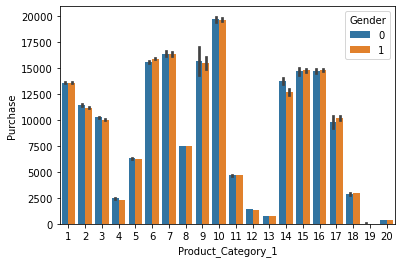

In [44]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

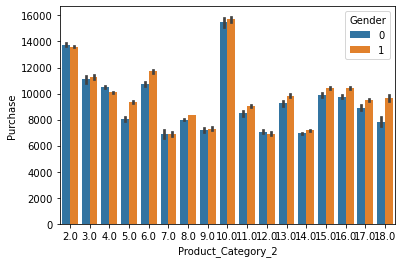

In [45]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

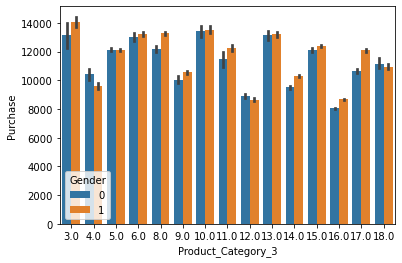

In [46]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

# Feature Scaling

In [47]:
df_test=df[df['Purchase'].isnull()]

In [48]:
df_test

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,4,7,1,2,1,1,11.0,16.0,NaN
1,P00113442,1,2,17,2,0,0,3,5.0,16.0,NaN
2,P00288442,0,3,1,1,4,1,5,14.0,16.0,NaN
3,P00145342,0,3,1,1,4,1,4,9.0,16.0,NaN
4,P00053842,0,2,1,2,1,0,4,5.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,2,15,1,4,1,8,8.0,16.0,NaN
233595,P00254642,0,2,15,1,4,1,5,8.0,16.0,NaN
233596,P00031842,0,2,15,1,4,1,1,5.0,12.0,NaN
233597,P00124742,0,4,1,2,4,0,10,16.0,16.0,NaN


In [49]:
df_train=df[~df['Purchase'].isnull()]

In [50]:
df_train

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,1,6,16,2,4,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,5,13,1,1,1,20,8.0,16.0,368.0
550064,P00375436,0,2,1,2,3,0,20,8.0,16.0,371.0
550065,P00375436,0,2,15,1,4,1,20,8.0,16.0,137.0
550066,P00375436,0,6,1,2,2,0,20,8.0,16.0,365.0


In [51]:
x=df_train.drop(['Product_ID','Purchase'],axis=1)
x.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,8.0,16.0
1,0,0,10,0,2,0,1,6.0,14.0
2,0,0,10,0,2,0,12,8.0,16.0
3,0,0,10,0,2,0,12,14.0,16.0
4,1,6,16,2,4,0,8,8.0,16.0


In [52]:
y=df_train['Purchase']
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler
scal=StandardScaler()
x_train=scal.fit_transform(x_train)
x_test=scal.transform(x_test)

Train the model

In [55]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [56]:
print('Intercept parameter:', reg.intercept_)
coeff_df = pd.DataFrame(reg.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 9260.52247622407
                            Coefficient
Gender                       220.024393
Age                          162.702811
Occupation                    41.562937
City_Category                260.192113
Stay_In_Current_City_Years    11.694143
Marital_Status               -29.710329
Product_Category_1         -1594.344979
Product_Category_2            -5.791251
Product_Category_3          -422.392660


In [57]:
reg.score(x_test,y_test)

0.12922937601186246

In [58]:
predictions = reg.predict(x_test)
print("Predicted purchases for new costumers:", predictions)

Predicted purchases for new costumers: [11757.6798849  10577.94925738  7278.48895506 ... 10345.62649783
 11577.14957853 10752.985348  ]


In [60]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 3578.375623356919
MSE: 21945673.39187476
